In [294]:
import numpy as np
import pandas as pd
import matplotlib as plt 
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore')

In [ ]:
df=pd.read_csv('/kaggle/input/titanic-dataset/.csv')
test=pd.read_csv()

In [296]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [297]:
df.shape

(891, 12)

In [298]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [300]:
numerical_cols = df.select_dtypes(include=['number'])

for col in numerical_cols :
    print(f"number of unique values is {df[col].nunique()} in {col}")

number of unique values is 891 in PassengerId
number of unique values is 2 in Survived
number of unique values is 3 in Pclass
number of unique values is 88 in Age
number of unique values is 7 in SibSp
number of unique values is 7 in Parch
number of unique values is 248 in Fare


In [301]:
df.drop("Cabin",axis=1,inplace=True)


In [302]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [303]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


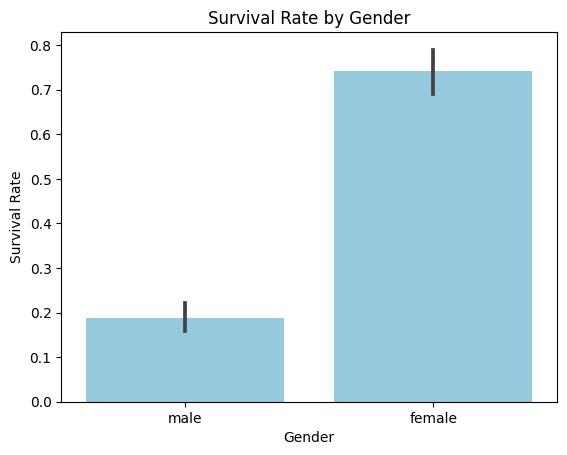

In [304]:
sns.barplot(x='Sex', y='Survived', data=df, color='skyblue')

plt.title('Survival Rate by Gender')
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

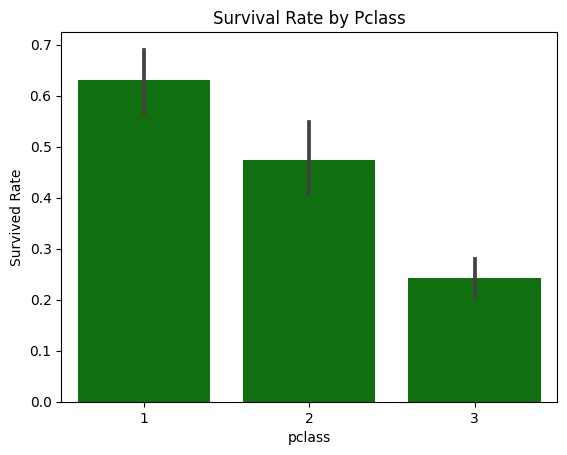

In [305]:
sns.barplot(x='Pclass',y='Survived',data=df,color='green')
plt.title('Survival Rate by Pclass')
plt.xlabel("pclass")
plt.ylabel("Survived Rate")
plt.show()

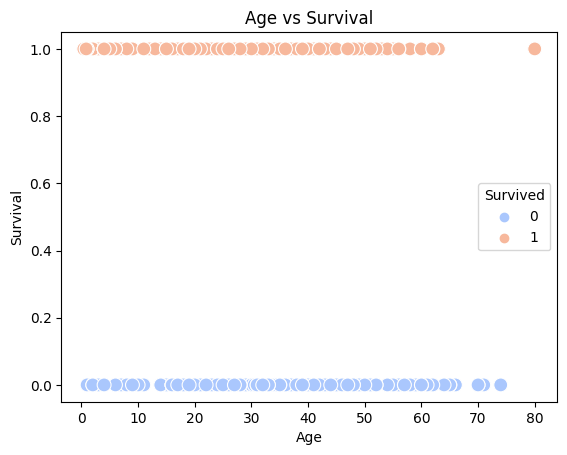

In [306]:
sns.scatterplot(x='Age', y='Survived', data=df, hue='Survived', palette='coolwarm', s=100)

plt.title('Age vs Survival')
plt.xlabel('Age')
plt.ylabel('Survival')
plt.show()


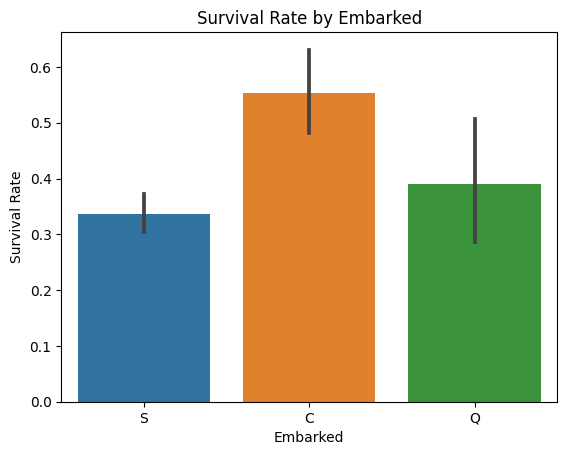

In [307]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()


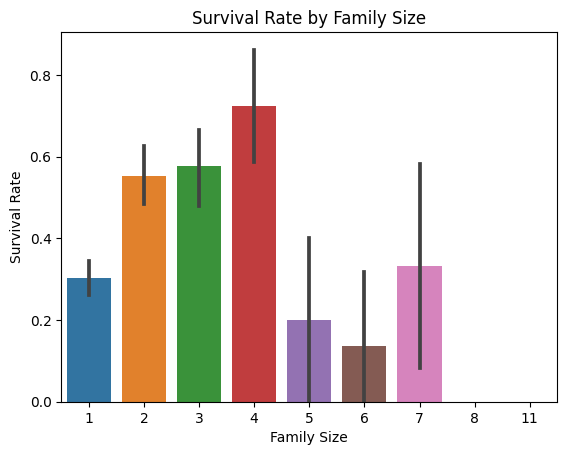

In [308]:
df['FamilySize'] = df['SibSp'] + df['Parch']+1
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


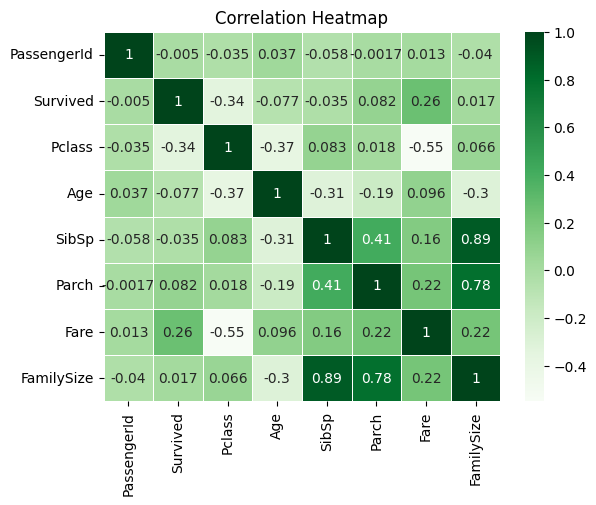

In [309]:

numerical_cols = df.select_dtypes(include=['number'])

correlation = numerical_cols.corr()

sns.heatmap(data=correlation, annot=True, cmap="Greens", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


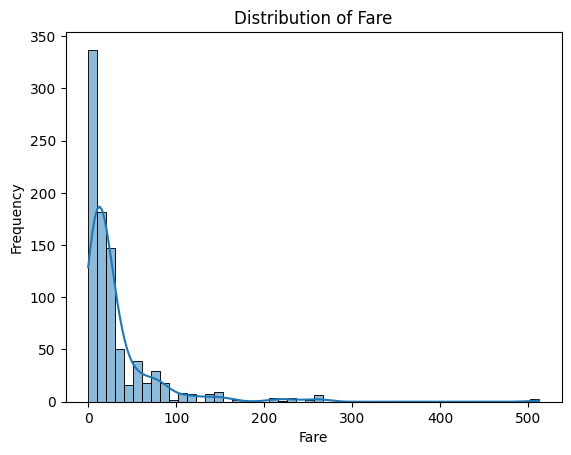

In [310]:
sns.histplot(df["Fare"],kde=True,bins=50)
plt.title('Distribution of Fare')
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

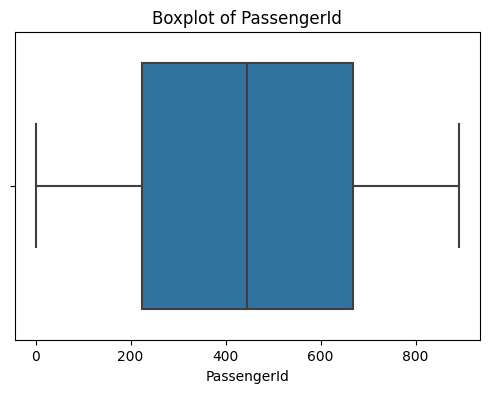

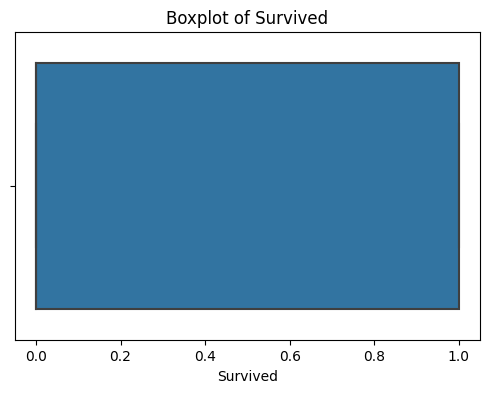

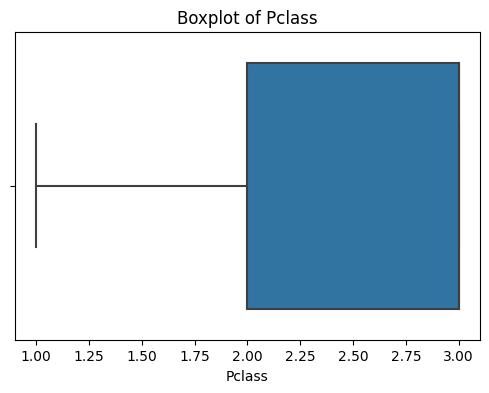

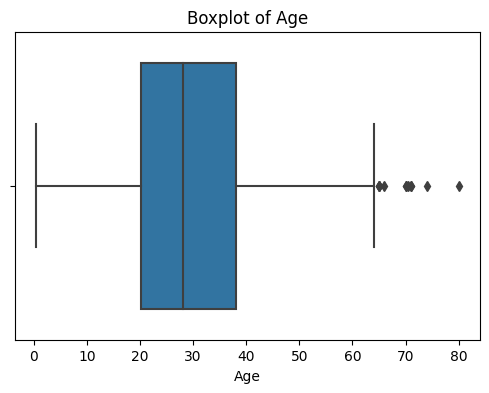

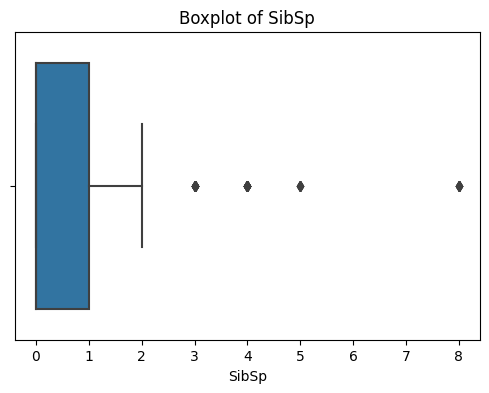

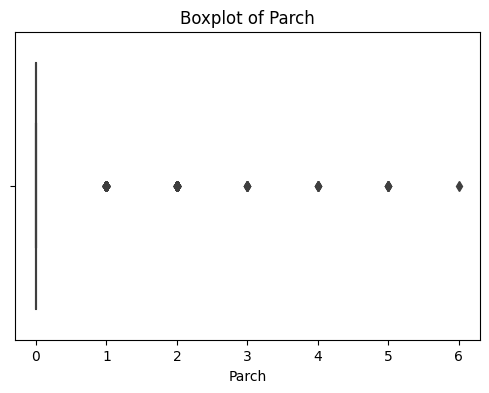

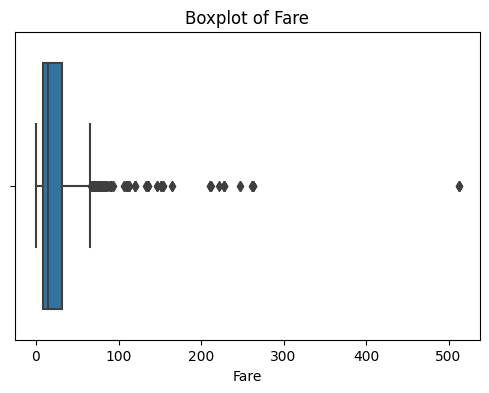

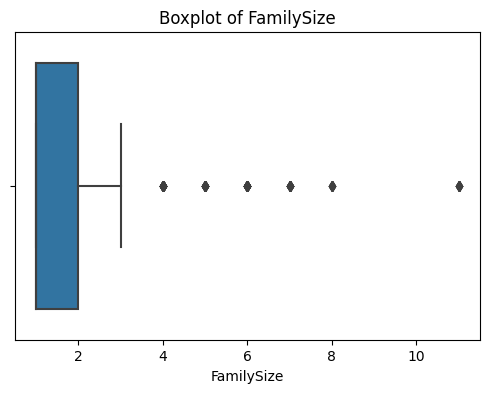

In [311]:
for col in numerical_cols.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [312]:
for col in numerical_cols:
    Q1=df[col].quantile(.25)
    Q2=df[col].quantile(.75)
    IQR=Q2-Q1

    lower=Q1-1.5*IQR
    upper=Q2+1.5*IQR
    df[col] = df[col].clip(lower=lower, upper=upper)


# Preprocessing

In [313]:
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  FamilySize   891 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 83.7+ KB


In [315]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
FamilySize       0
dtype: int64

In [316]:
df["Age"]=df['Age'].fillna(df['Age'].mean())

In [317]:

lbl = LabelEncoder()

for col in ['Sex', 'Embarked']: 
    df[col] = lbl.fit_transform(df[col])


In [318]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,2,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,2,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,2,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,2,1.0


In [319]:
x=df.drop(['Name','PassengerId','Survived','Ticket'],axis=1)
y=df['Survived']

In [320]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

# Models

Logistic regression as baseline 

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [322]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=123)


In [323]:
models={
        'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'XGBoost': XGBClassifier()
}

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    Train_accuracy=accuracy_score(y_train,y_pred_train)
    Test_accuracy=accuracy_score(y_test,y_pred_test)
    print(f"Model : {name}")
    print(f"Training accuracy : {Train_accuracy :.3f}") 
    print(f"Testing accuracy : {Test_accuracy :.3f}") 
    print("--------------")

Model : Logistic Regression
Training accuracy : 0.793
Testing accuracy : 0.787
--------------
Model : Random Forest
Training accuracy : 0.987
Testing accuracy : 0.810
--------------
Model : Decision Tree
Training accuracy : 0.987
Testing accuracy : 0.776
--------------
Model : KNN
Training accuracy : 0.856
Testing accuracy : 0.802
--------------
Model : SVC
Training accuracy : 0.830
Testing accuracy : 0.843
--------------
Model : XGBoost
Training accuracy : 0.978
Testing accuracy : 0.821
--------------


# Tunning

In [325]:

# إنشاء نموذج XGBoost
xgb_model = XGBClassifier()

# تحديد القيم المحتملة للهايبر بارامترات
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [ 300,350,400],
    'max_depth': [2, 3, 4],
    'subsample': [0.5, 0.6, 0.7],
    'colsample_bytree': [0.6, 1.2]
}

# تطبيق GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# تدريب GridSearch
grid_search_xgb.fit(x_train, y_train)

best_params = grid_search_xgb.best_params_
print(f"Best Hyperparameters for XGBoost: {best_params}")

best_xgb_model = grid_search_xgb.best_estimator_

# التقييم على البيانات الاختبارية
y_pred_test_xgb = best_xgb_model.predict(x_test)
Test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)
print(f"Testing accuracy with best parameters for XGBoost: {Test_accuracy_xgb:.3f}")


Best Hyperparameters for XGBoost: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 350, 'subsample': 0.7}
Testing accuracy with best parameters for XGBoost: 0.858


In [328]:

rf_clf = RandomForestClassifier()

param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [5, 6, 7],
    'min_samples_split': [5, 6, 7],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2']
}

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search_rf.fit(x_train, y_train)

best_params = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params}")

best_randomforest_model = grid_search_rf.best_estimator_

y_pred_test_rf = best_randomforest_model.predict(x_test)
Test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"Testing accuracy with best parameters for Random Forest: {Test_accuracy_rf:.3f}")


Best Hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Testing accuracy with best parameters for Random Forest: 0.847


In [343]:
dt_clf=DecisionTreeClassifier()

param_grid={
    'criterion' : ["gini", "entropy"],
    'max_depth': [19, 20, 21],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [3,4,5],
    'max_features': ['sqrt', 'log2'],
    
}

grid_search_dt=GridSearchCV(estimator=dt_clf,param_grid=param_grid,cv=5,n_jobs=-1)
grid_search_dt.fit(x_train,y_train)

best_params=grid_search_dt.best_params_
print(f"Best Hyperparameters for Decision forest: {best_params}")
best_decisionforest_model=grid_search_dt.best_estimator_

y_pred_test_dt=best_decisionforest_model.predict(x_test)
Test_accuracy_dt=accuracy_score(y_test,y_pred_test_dt)
print(f"Testing accuracy with best parameters for Decision tree: {Test_accuracy_dt:.3f}")




Best Hyperparameters for Decision forest: {'criterion': 'gini', 'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4}
Testing accuracy with best parameters for Decision tree: 0.832


In [345]:
from sklearn.metrics import classification_report

# --- ْXGBoost Report ---
print("--------------- XGB -----------------")
print(f"Test Accuracy (XGB): {round(Test_accuracy_xgb, 3)}")
print("\nClassification Report (XGB):")
print(classification_report(y_test, y_pred_test_xgb))

# --- Random forest Report ---
print("--------------- Random forest -----------------")
print(f"Test Accuracy (Random forest): {round(Test_accuracy_rf, 3)}")
print("\nClassification Report (Random forest):")
print(classification_report(y_test, y_pred_test_rf))

# --- Decision tree Report ---
print("--------------- Decision tree -----------------")
print(f"Test Accuracy (Decision tree): {round(Test_accuracy_dt, 3)}")
print("\nClassification Report (Decision tree):")
print(classification_report(y_test, y_pred_test_dt))


--------------- XGB -----------------
Test Accuracy (XGB): 0.858

Classification Report (XGB):
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       170
           1       0.85      0.74      0.79        98

    accuracy                           0.86       268
   macro avg       0.86      0.83      0.84       268
weighted avg       0.86      0.86      0.86       268

--------------- Random forest -----------------
Test Accuracy (Random forest): 0.847

Classification Report (Random forest):
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       170
           1       0.84      0.71      0.77        98

    accuracy                           0.85       268
   macro avg       0.85      0.82      0.83       268
weighted avg       0.85      0.85      0.84       268

--------------- Decision tree -----------------
Test Accuracy (Decision tree): 0.832

Classification Report (Decision tree):
 